In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
import warnings
warnings.simplefilter("ignore")

In [109]:
df = pd.read_csv("../artifacts/raw/train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN34579,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,INN14268,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,INN00810,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,INN32373,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,INN12805,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [110]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [111]:
df.drop(columns=['Booking_ID'], inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [112]:
df.shape

(29020, 18)

In [113]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [114]:
df.duplicated().sum()

np.int64(7695)

In [115]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [116]:
df.shape

(21325, 18)

In [117]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15194
Canceled         6131
Name: count, dtype: int64

In [118]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [119]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15351
Room_Type 4     4406
Room_Type 6      760
Room_Type 2      480
Room_Type 5      192
Room_Type 7      132
Room_Type 3        4
Name: count, dtype: int64

In [120]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [121]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


#### UNIVARIATE ANALYSIS

In [122]:
def num_plot_dist(df, num_features):
    fig, axis = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axis = [axis]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axis[i][0], kde=True, palette="viridis")
        axis[i][0].set_title(f"Distribution of {column}")

        sns.boxplot(data=df, x=column, ax=axis[i][1], palette="viridis")
        axis[i][1].set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

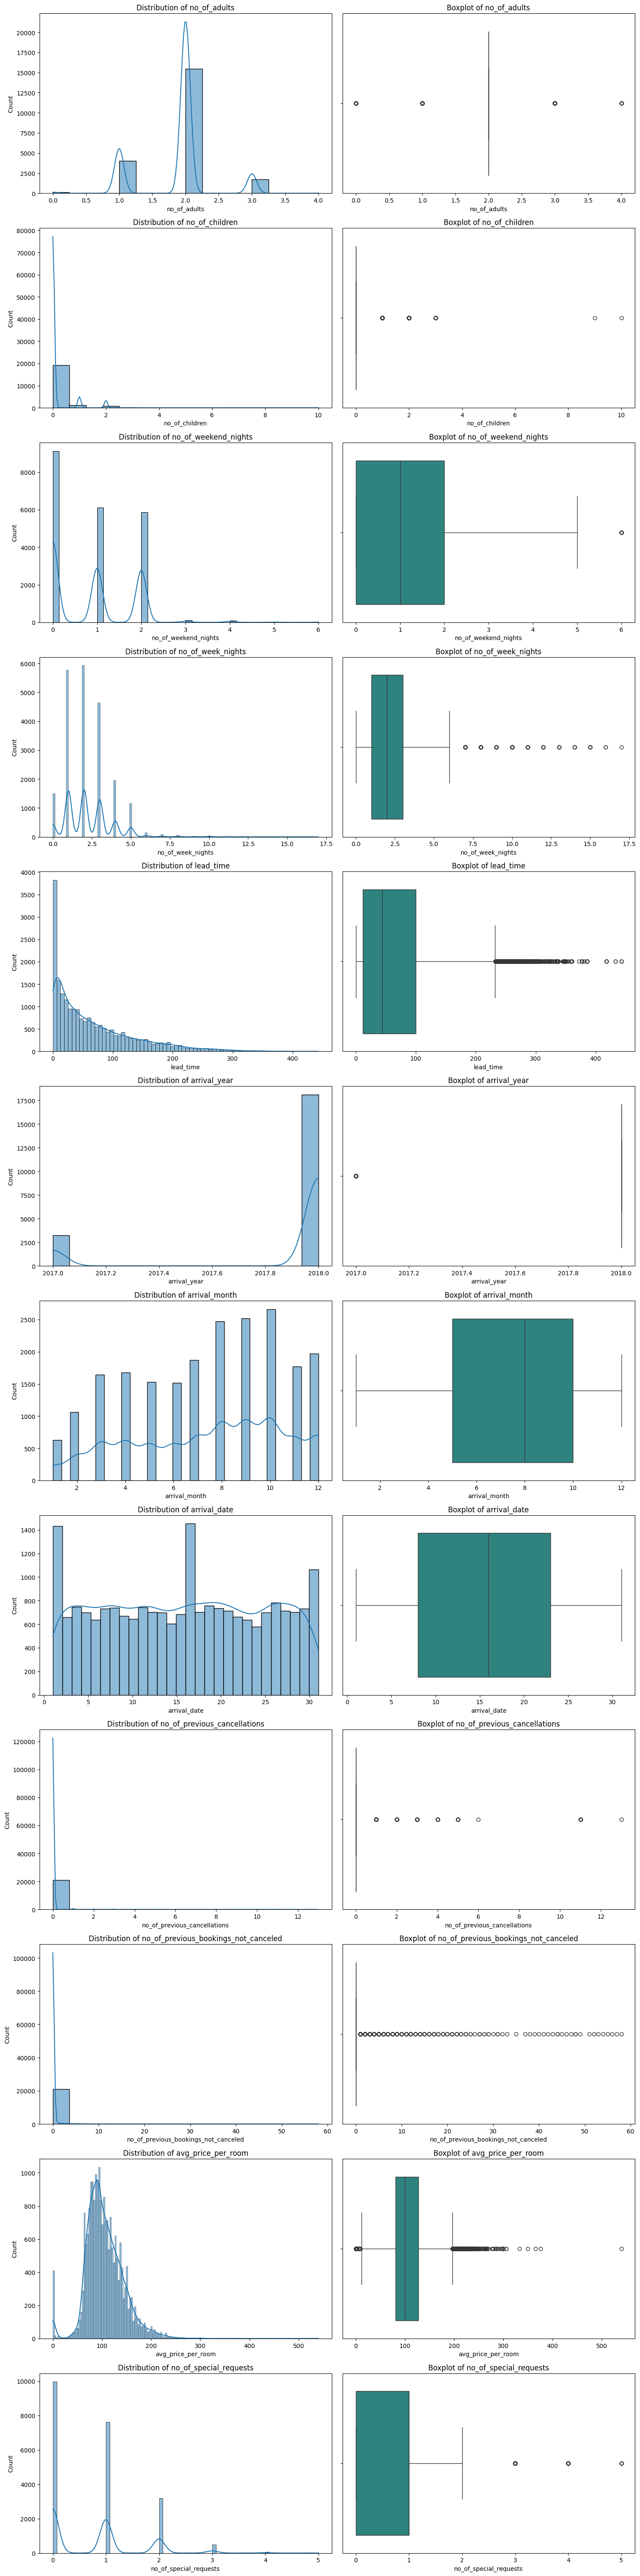

In [123]:
num_plot_dist(data, num_cols)

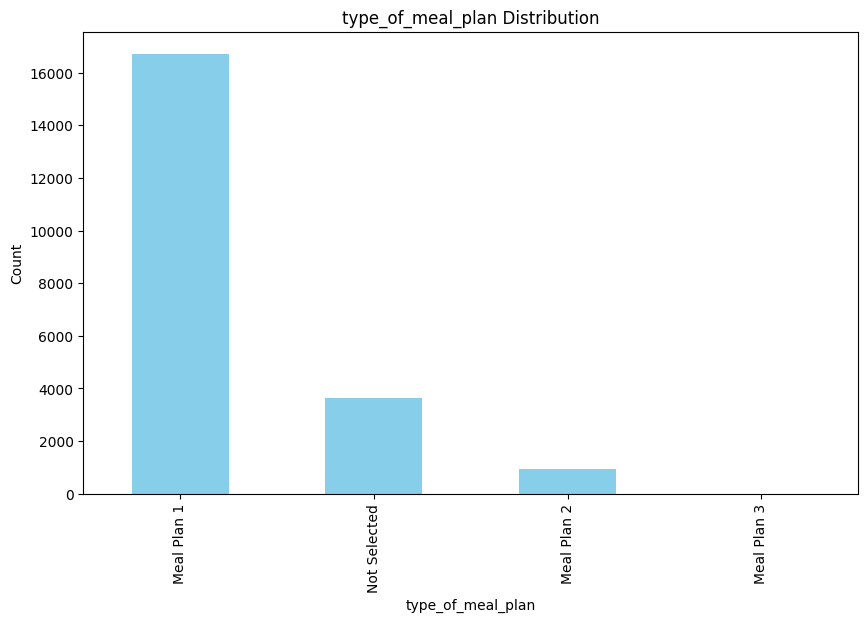

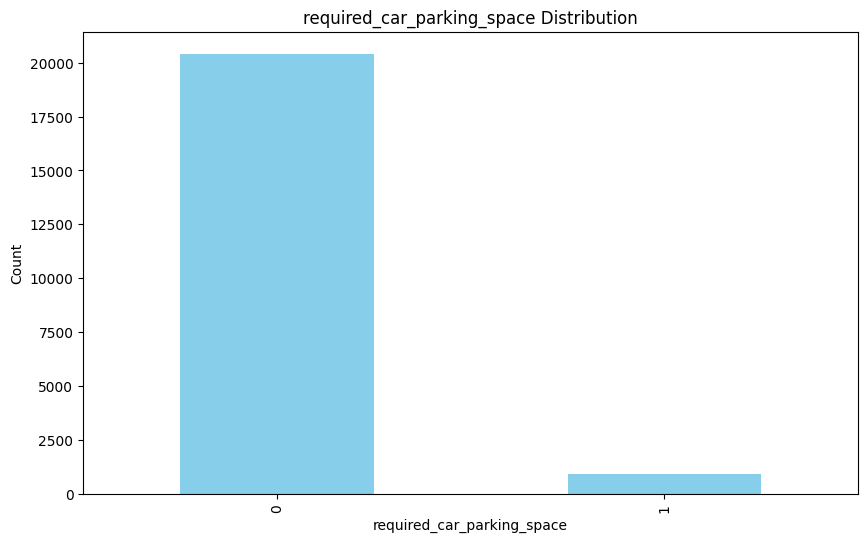

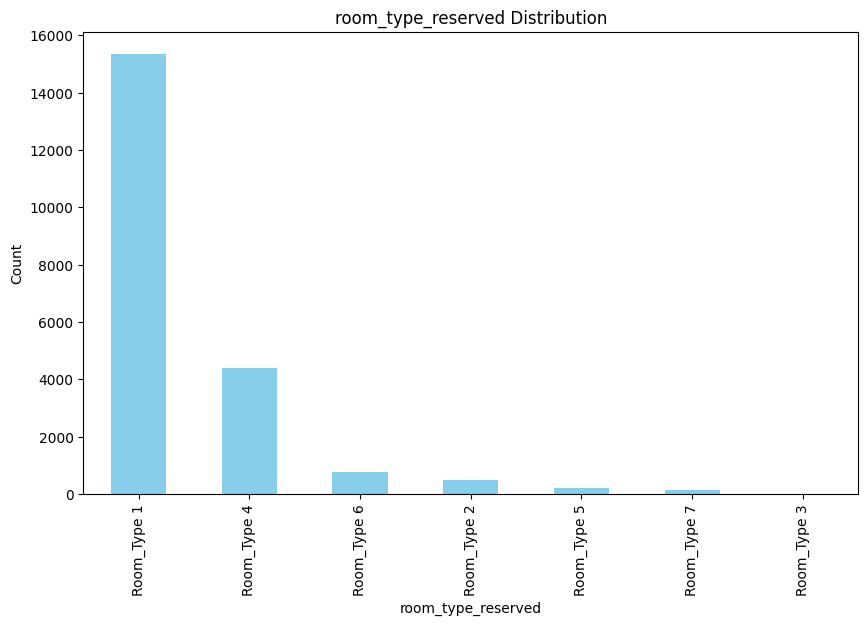

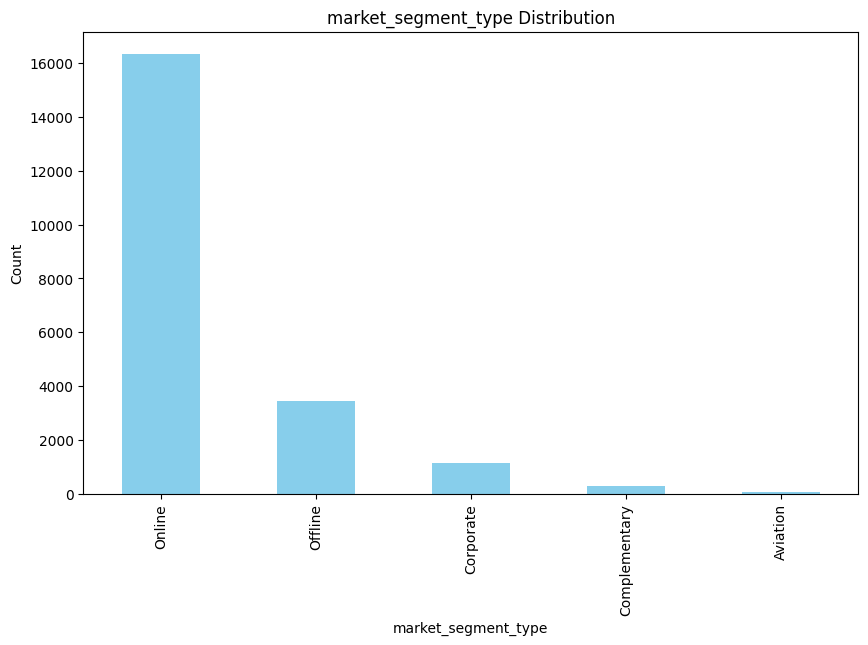

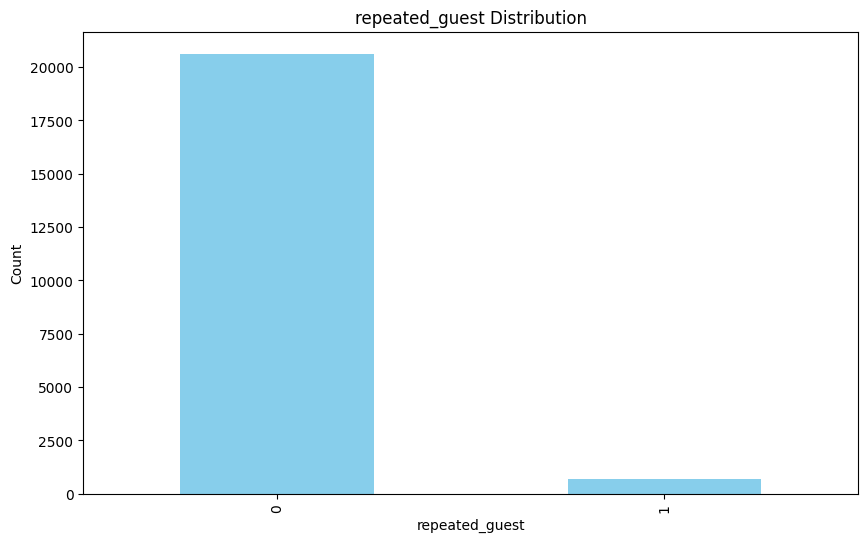

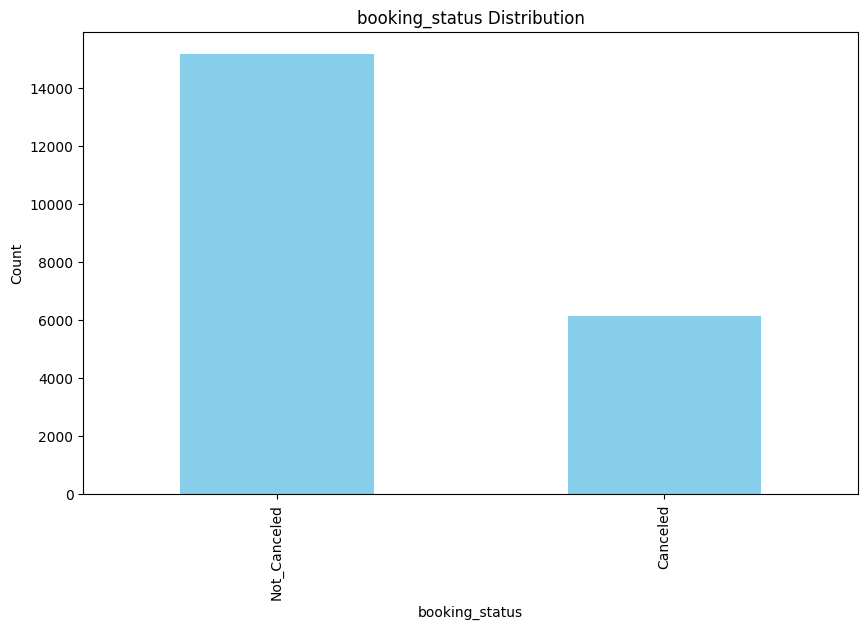

In [124]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivarite Analysis

In [125]:
def plot_bivarite_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features): 
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()  
    

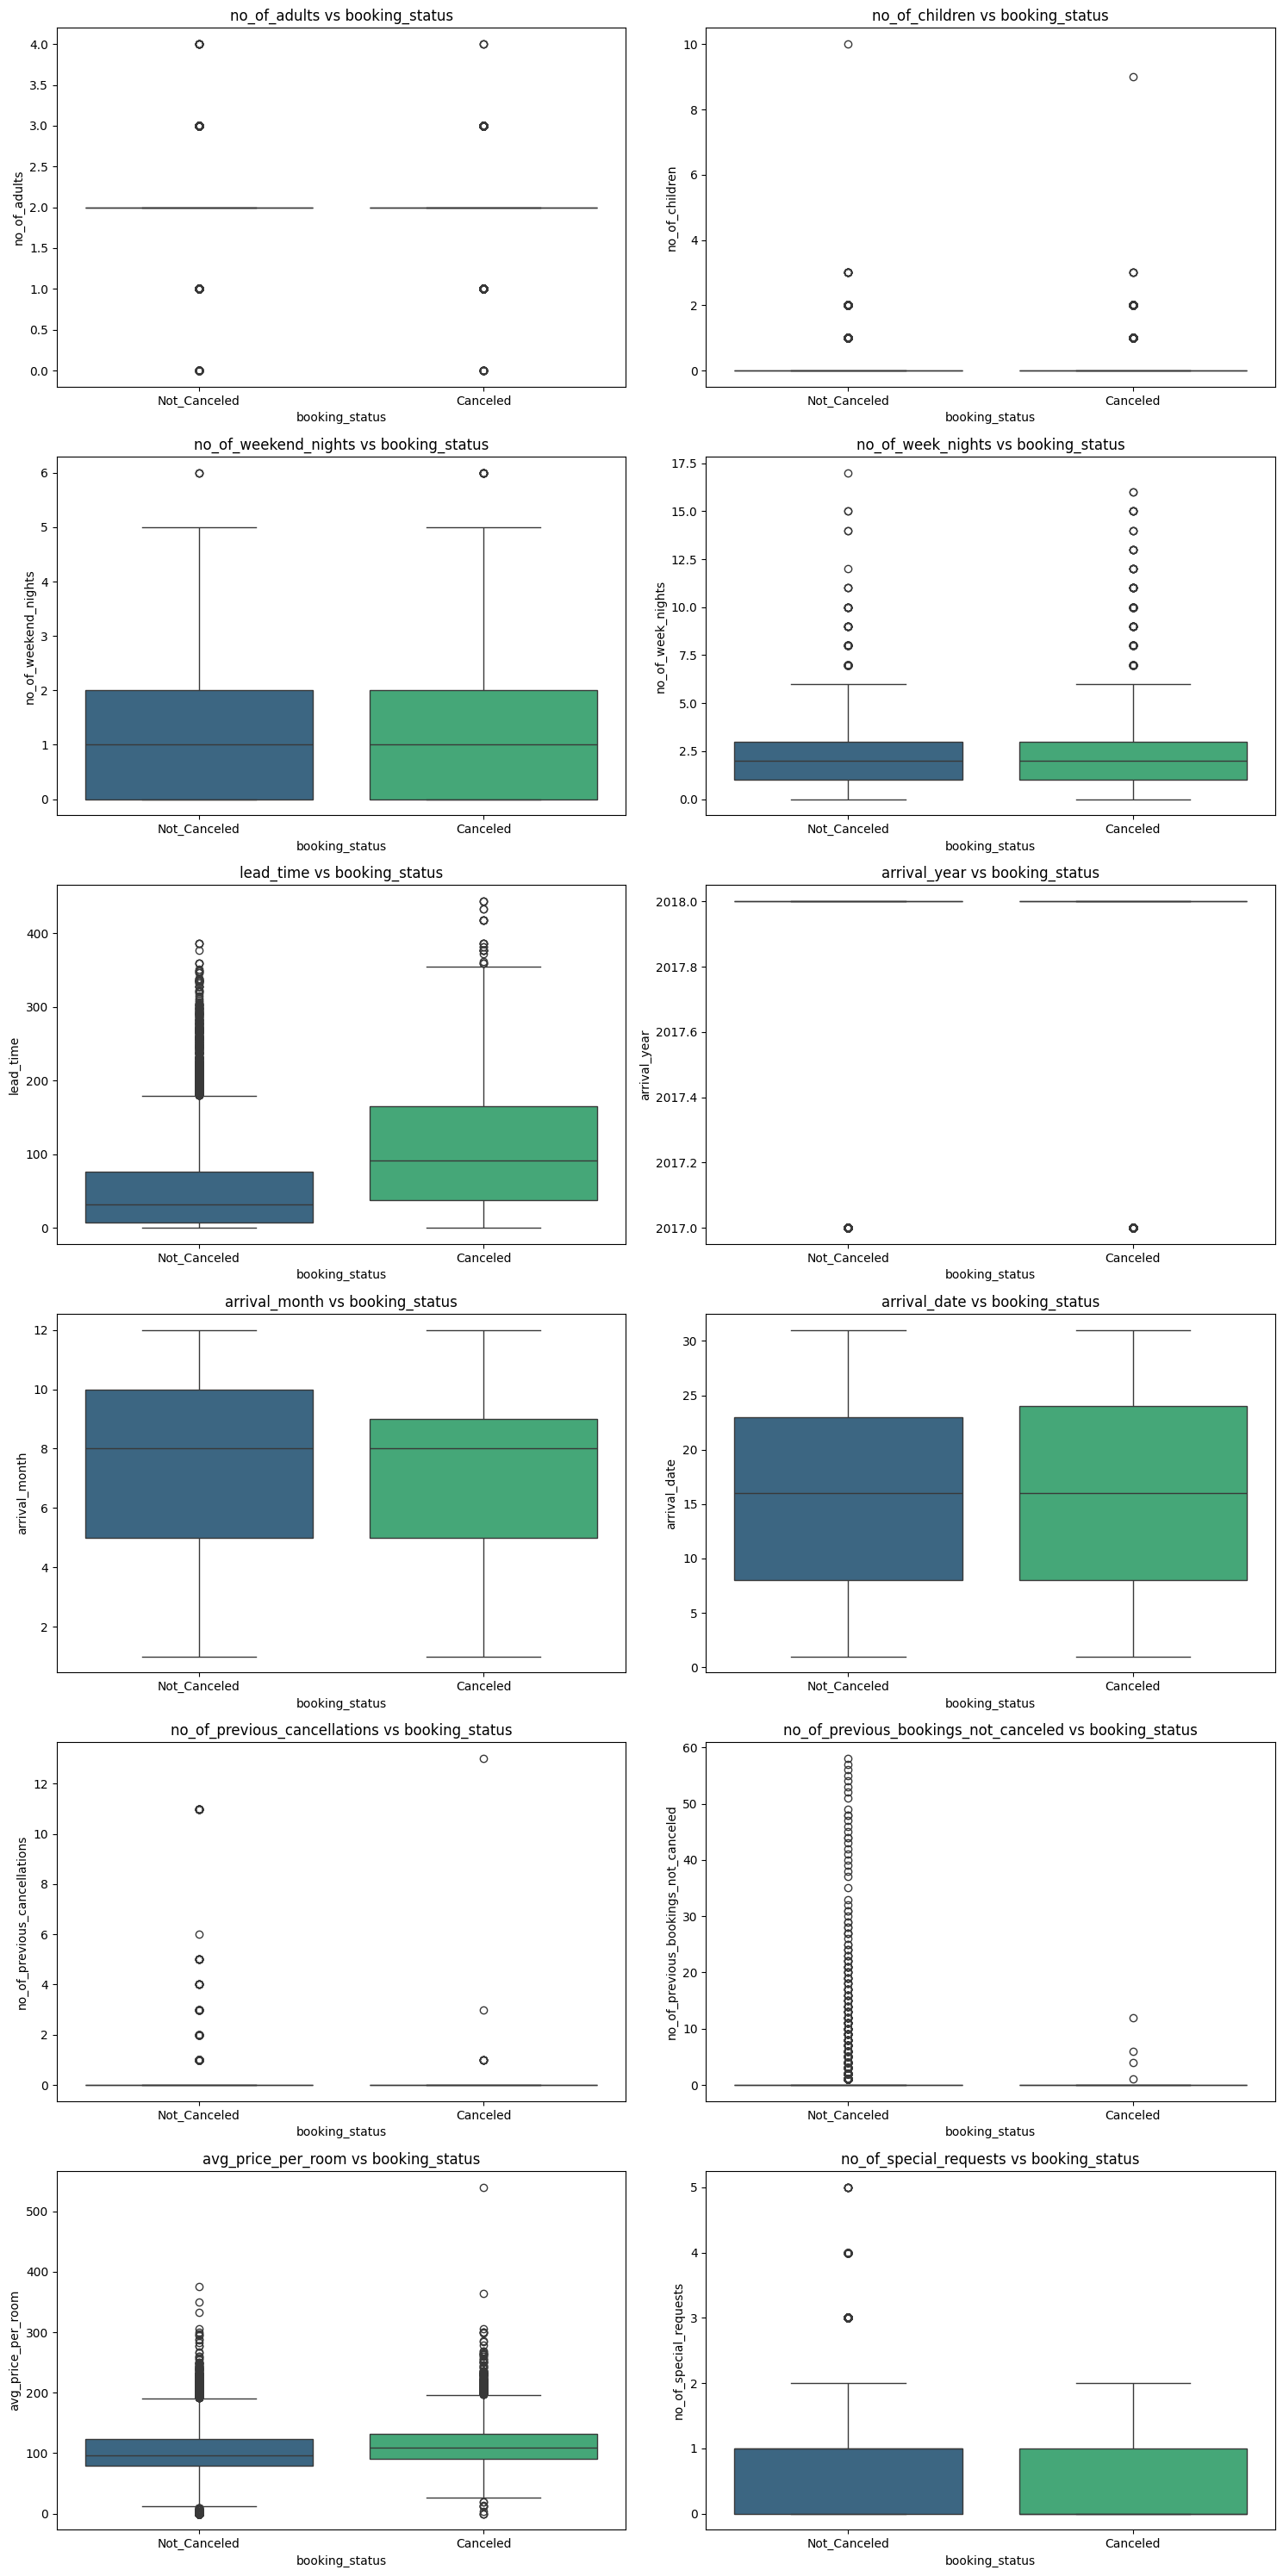

In [126]:
plot_bivarite_num(data, 'booking_status', num_cols)

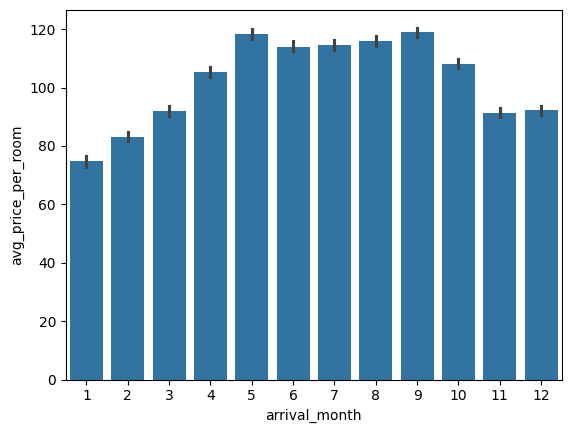

In [127]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [128]:
def plot_bivaraite_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, palette="viridis", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

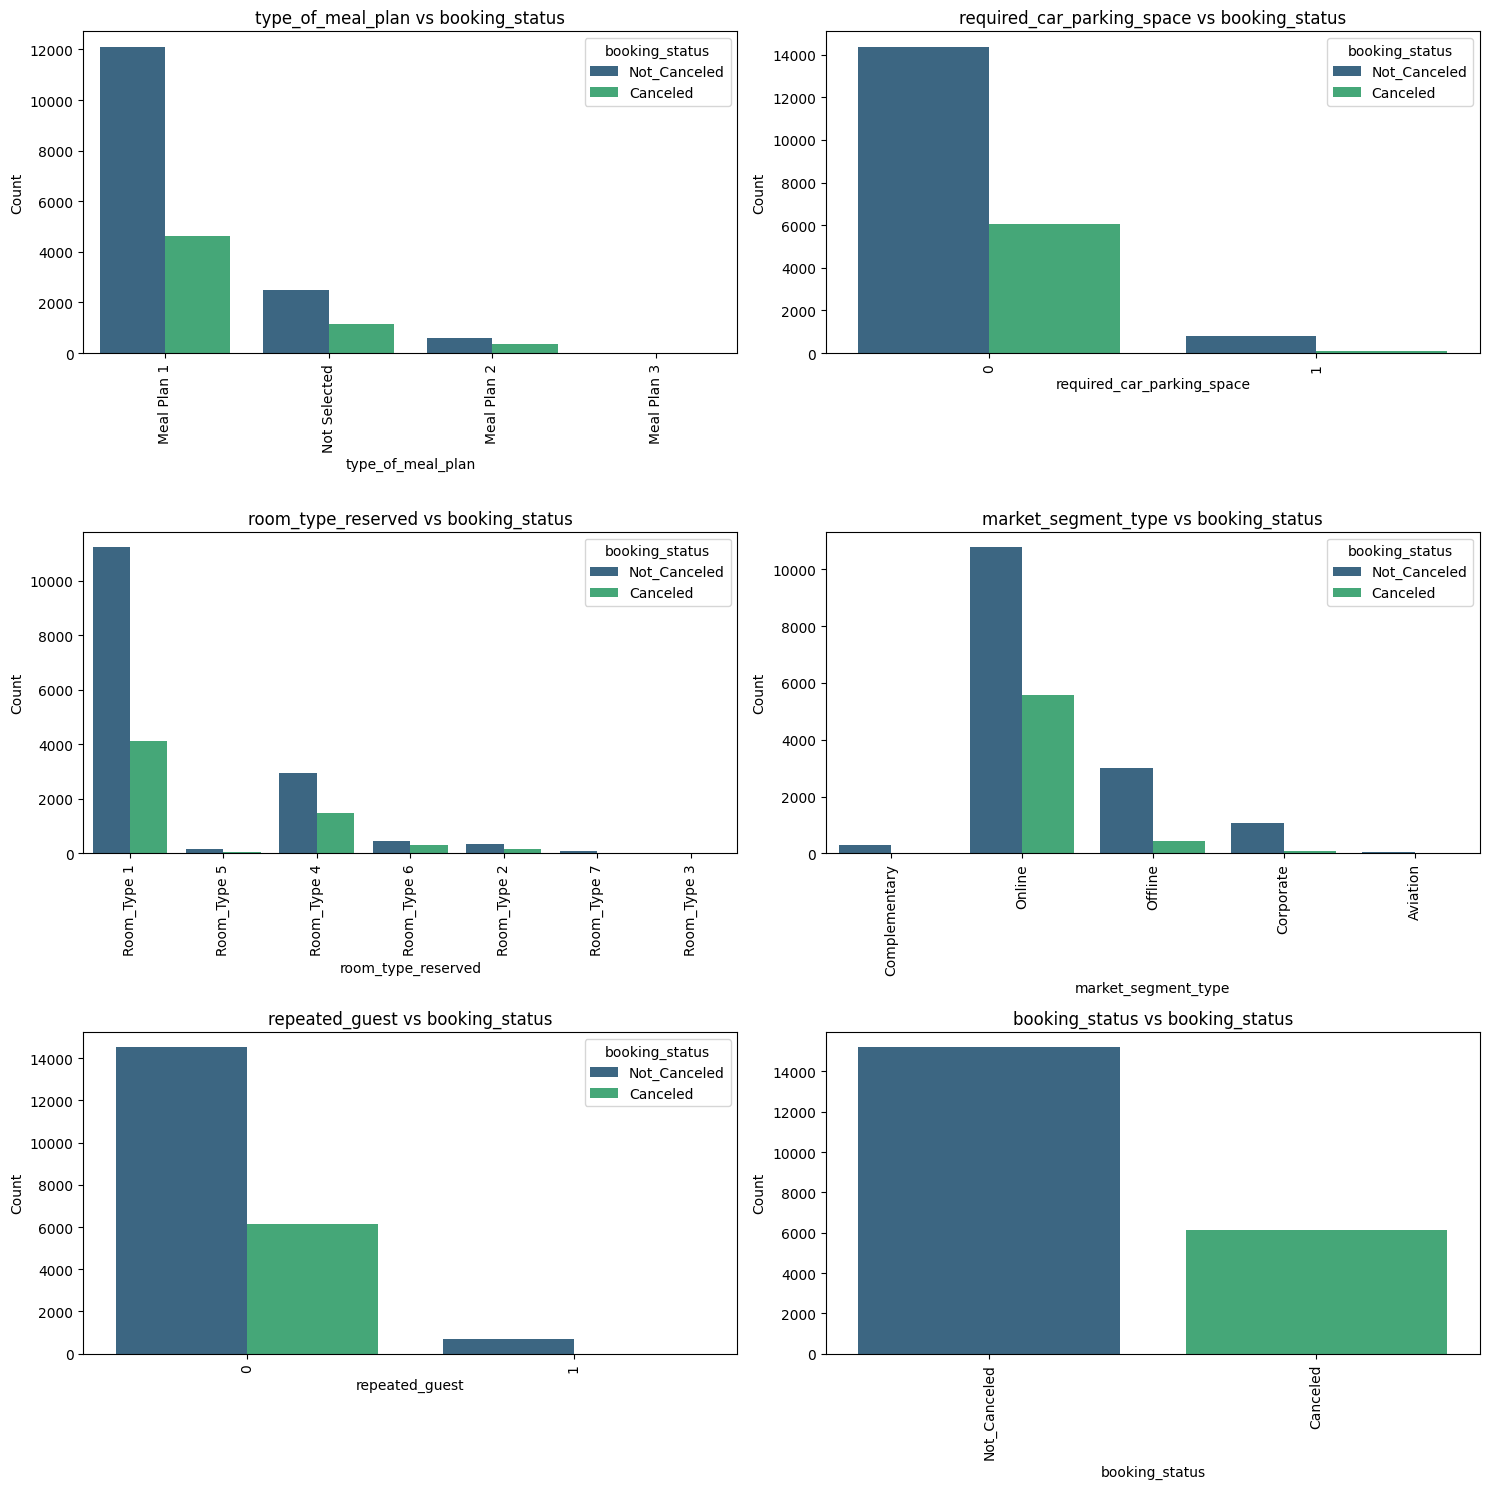

In [129]:
plot_bivaraite_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [130]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  object 
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  object 
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

##### Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [134]:
print(mappings)

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}, 'required_car_parking_space': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'room_type_reserved': {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}, 'market_segment_type': {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}, 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}


In [135]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,0,0,0,0,2017,9,17,1,0,0,0,0.0,0,1
1,1,0,1,0,3,0,4,3,2018,9,26,4,0,0,0,195.0,0,1
2,1,0,1,1,0,0,0,0,2018,1,2,4,0,0,0,86.0,0,1
3,2,0,1,2,0,0,0,5,2017,10,19,3,0,0,0,90.0,0,1
4,2,0,2,5,0,0,0,247,2018,9,26,4,0,0,0,100.3,1,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  int64  
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  int64  
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [137]:
#!pip install statsmodels

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [139]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF0"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [140]:
vif_data

,feature,VIF0
0,const,4.099586e+07
1,no_of_adults,1.330653e+00
2,no_of_children,1.280503e+00
3,no_of_weekend_nights,1.076521e+00
4,no_of_week_nights,1.133501e+00
5,type_of_meal_plan,1.176542e+00
6,required_car_parking_space,1.033723e+00
7,room_type_reserved,1.559324e+00
8,lead_time,1.406160e+00
9,arrival_year,1.289045e+00


##### Our Data dosen't have any multicollinearity issue

#### Correlation Matrix

In [141]:
corr = df.corr()

In [142]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.040521,0.089239,0.114448,-0.006697,0.002112,0.272756,0.153753,0.099433,0.007789,0.018548,0.312083,-0.239510,-0.065868,-0.146162,0.324889,0.150687,-0.096987
no_of_children,-0.040521,1.000000,0.012077,0.015739,-0.103926,0.015474,0.360213,0.007986,0.034024,0.000612,0.029354,0.099679,-0.048258,-0.021476,-0.028921,0.350603,0.101615,-0.063995
no_of_weekend_nights,0.089239,0.012077,1.000000,0.232266,-0.042480,-0.053972,0.027680,0.130421,0.031886,0.011988,0.004725,0.094205,-0.087572,-0.028679,-0.035864,0.000387,0.015247,-0.073793
no_of_week_nights,0.114448,0.015739,0.232266,1.000000,-0.079454,-0.058385,0.088736,0.225860,0.017941,0.033003,-0.000549,0.116748,-0.119250,-0.038560,-0.059999,0.016285,0.033995,-0.125572
type_of_meal_plan,-0.006697,-0.103926,-0.042480,-0.079454,1.000000,-0.019898,-0.246920,-0.048212,0.097165,0.007883,-0.007028,0.181386,-0.070542,-0.010938,-0.045875,-0.104114,-0.011582,-0.037901
required_car_parking_space,0.002112,0.015474,-0.053972,-0.058385,-0.019898,1.000000,0.016551,-0.043752,0.004186,-0.011874,-0.004174,-0.042907,0.114909,0.033122,0.061537,0.052135,0.067029,0.090042
room_type_reserved,0.272756,0.360213,0.027680,0.088736,-0.246920,0.016551,1.000000,-0.020824,0.087056,-0.001137,0.030436,0.088500,-0.042101,-0.017596,-0.022417,0.491085,0.090192,-0.070656
lead_time,0.153753,0.007986,0.130421,0.225860,-0.048212,-0.043752,-0.020824,1.000000,0.167458,0.134028,0.036435,0.138066,-0.148284,-0.054566,-0.086475,-0.045572,-0.008188,-0.370313
arrival_year,0.099433,0.034024,0.031886,0.017941,0.097165,0.004186,0.087056,0.167458,1.000000,-0.323476,0.013058,0.110685,-0.010733,0.009326,0.024672,0.176313,-0.001345,-0.152981
arrival_month,0.007789,0.000612,0.011988,0.033003,0.007883,-0.011874,-0.001137,0.134028,-0.323476,1.000000,-0.018516,-0.017841,-0.005282,-0.042759,-0.004599,0.061871,0.137535,0.018104


<Axes: >

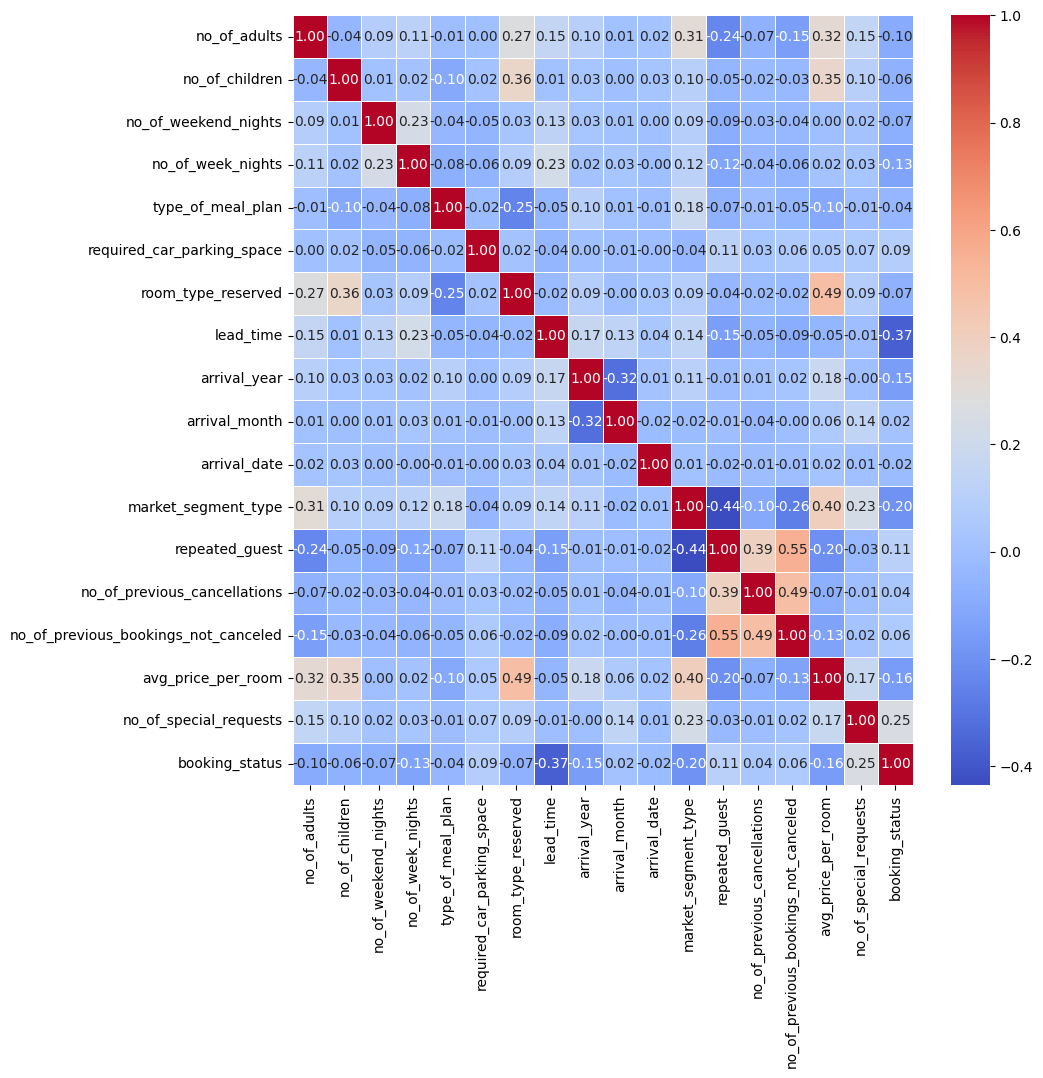

In [143]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#### Skewness

In [144]:
skewness = df.skew()
skewness

no_of_adults                            -0.284713
no_of_children                           3.959571
no_of_weekend_nights                     0.650873
no_of_week_nights                        1.562449
type_of_meal_plan                        1.640058
required_car_parking_space               4.539907
room_type_reserved                       1.389148
lead_time                                1.406736
arrival_year                            -1.952187
arrival_month                           -0.290009
arrival_date                             0.002855
market_segment_type                     -2.360891
repeated_guest                           5.273472
no_of_previous_cancellations            21.625190
no_of_previous_bookings_not_canceled    16.344381
avg_price_per_room                       0.604370
no_of_special_requests                   0.921614
booking_status                          -0.939076
dtype: float64

#### Adjust the columns with high skew
Will use log transformation method

In [145]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [146]:
skewness = df.skew()
skewness

no_of_adults                            -0.284713
no_of_children                           3.959571
no_of_weekend_nights                     0.650873
no_of_week_nights                        1.562449
type_of_meal_plan                        1.640058
required_car_parking_space               4.539907
room_type_reserved                       1.389148
lead_time                                1.406736
arrival_year                            -1.952187
arrival_month                           -0.290009
arrival_date                             0.002855
market_segment_type                     -2.360891
repeated_guest                           5.273472
no_of_previous_cancellations            12.957827
no_of_previous_bookings_not_canceled     7.620208
avg_price_per_room                       0.604370
no_of_special_requests                   0.921614
booking_status                          -0.939076
dtype: float64

#### Imbalanced Dataset 

In [147]:
df["booking_status"].value_counts()

booking_status
1    15194
0     6131
Name: count, dtype: int64

In [148]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']
X.shape, y.shape

((21325, 17), (21325,))

In [149]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [150]:
y.value_counts()


booking_status
1    15194
0     6131
Name: count, dtype: int64

#### Apply SMOTE smapling

In [152]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=97)

X_res, y_res = smote.fit_resample(X, y)

In [154]:
y_res.value_counts()


booking_status
1    15194
0    15194
Name: count, dtype: int64

#### Creating a new df which include the new resampled data

In [156]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [157]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,0,0,0,0,2017,9,17,1,0.0,0.0,0.0,0.0,0,1
1,1,0,1,0,3,0,4,3,2018,9,26,4,0.0,0.0,0.0,195.0,0,1
2,1,0,1,1,0,0,0,0,2018,1,2,4,0.0,0.0,0.0,86.0,0,1
3,2,0,1,2,0,0,0,5,2017,10,19,3,0.0,0.0,0.0,90.0,0,1
4,2,0,2,5,0,0,0,247,2018,9,26,4,0.0,0.0,0.0,100.3,1,0


In [158]:
balanced_df.shape

(30388, 18)

In [159]:
df = balanced_df.copy()